In [3]:
import pandas as pd

In [7]:
cd Downloads/Dataset/

/Users/intaewoo/Downloads/Dataset


In [9]:
data = pd.read_csv('Dataset_01.csv')
data

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [12]:
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
data.isna().sum().sum()

26

In [24]:
data.isna().sum(axis=1) # 열별 결측치 수 확인
data.isna().any(axis=1).sum() # 행별 결측치 수 확인

26

In [25]:
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234

In [28]:
data[['TV','Radio','Social_Media','Sales']].corr()

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [32]:
Q2=data[['TV','Radio','Social_Media','Sales']].corr()

In [41]:
Q2_abs = Q2.abs() # 음수를 고려할 경우
Q2_ans = Q2_abs['Sales'].sort_values(ascending=False)[1]
# 정답 : 0.9995

In [43]:
Q2_abs['Sales'].nlargest(2)[1]

0.999497444941335

In [44]:
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123

In [54]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from statsmodels.formula.api import ols

data1 = data.dropna()

In [58]:
lm = LinearRegression(fit_intercept=True)
lm.fit(data1.drop(columns=['Influencer','Sales']), data1.Sales)
dir(lm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [61]:
lm.coef_

array([-0.00397039,  0.00496402,  3.56256963])

In [62]:
# 정답 : 3.562, 0.004, -0.003

In [66]:
x = data1.drop(columns=['Influencer','Sales'])
xx = add_constant(x)
y = data1.Sales

In [68]:
ols1 = OLS(y,x).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.951e+06
Date:                Mon, 23 Aug 2021   Prob (F-statistic):                        0.00
Time:                        10:48:39   Log-Likelihood:                         -11367.
No. Observations:                4546   AIC:                                  2.274e+04
Df Residuals:                    4543   BIC:                                  2.276e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TV               3.5609      0.003   1133.941      0.000       3.555       3.567
Radio           -0.0039      0.010     -0.400      0.689      -0.023       0.015
Social_Media    -0.0013      0.024     -0.054      0.957      -0.049       0.047
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.038
Skew:                          -0.001   Prob(JB):                        0.981
Kurtosis:                       3.014   Cond. No.                         35.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# # 문제 02 유형(DataSet_02.csv 이용)
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
dataset2 = pd.read_csv('Dataset_02.csv')
dataset2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [77]:
Q1= pd.crosstab(index=[dataset2.Sex,dataset2.BP],
               columns=dataset2.Cholesterol)
Q1

Cholesterol  HIGH  NORMAL
Sex BP                   
F   HIGH       17      21
    LOW        14      14
    NORMAL     18      12
M   HIGH       18      21
    LOW        17      19
    NORMAL     19      10

In [78]:
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456

In [80]:
#tip. 변수 생성 후 카이스퀘어 검정
# 변수 변환
import numpy as np
# np.where
# Series.cut()

In [81]:
Q2 = dataset2.copy()

In [85]:
Q2['Age_gr'] = np.where(Q2.Age<20,'10',
                       np.where(Q2.Age<30,'20',
                               np.where(Q2.Age<40,'30',
                                       np.where(Q2.Age<50,'40',
                                               np.where(Q2.Age<60,'50','60')))))

In [91]:
pd.cut(Q2.Age,[0,20,30,40,50,60,Q2.Age.max()+1], right=False,
      labels=['10','20','30','40','50','60'])

In [94]:
Q2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20
1,47,M,LOW,HIGH,13.093,drugC,40
2,47,M,LOW,HIGH,10.114,drugC,40
3,28,F,NORMAL,HIGH,7.798,drugX,20
4,61,F,LOW,HIGH,18.043,DrugY,60
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,50
196,16,M,LOW,HIGH,12.006,drugC,10
197,52,M,NORMAL,HIGH,9.894,drugX,50
198,23,M,NORMAL,NORMAL,14.020,drugX,20


In [96]:
Q2['Na_k_gr']=np.where(Q2['Na_to_K'] <=10, 'Lv1',
                      np.where(Q2['Na_to_K'] <=20, 'Lv2',
                              np.where(Q2['Na_to_K'] <=30, 'Lv3','Lv4')))
Q2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr,Na_k_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20,Lv3
1,47,M,LOW,HIGH,13.093,drugC,40,Lv2
2,47,M,LOW,HIGH,10.114,drugC,40,Lv2
3,28,F,NORMAL,HIGH,7.798,drugX,20,Lv1
4,61,F,LOW,HIGH,18.043,DrugY,60,Lv2
...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,50,Lv2
196,16,M,LOW,HIGH,12.006,drugC,10,Lv2
197,52,M,NORMAL,HIGH,9.894,drugX,50,Lv1
198,23,M,NORMAL,NORMAL,14.020,drugX,20,Lv2


In [98]:
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345

In [98]:
import numpy as np # np.where
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [100]:
Q3 = dataset2.copy()
Q3['Sex_cd']=np.where(Q3.Sex =='M',0,1)
Q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cd
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,1
4,61,F,LOW,HIGH,18.043,DrugY,1
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1
196,16,M,LOW,HIGH,12.006,drugC,0
197,52,M,NORMAL,HIGH,9.894,drugX,0
198,23,M,NORMAL,NORMAL,14.020,drugX,0


In [99]:
Q3.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [103]:
Q3['BP_cd'] = np.where(Q3.BP=='LOW',0,
                      np.where(Q3.BP=='NORMAL',1,2))
Q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cd,BP_cd
0,23,F,HIGH,HIGH,25.355,DrugY,1,2
1,47,M,LOW,HIGH,13.093,drugC,0,0
2,47,M,LOW,HIGH,10.114,drugC,0,0
3,28,F,NORMAL,HIGH,7.798,drugX,1,1
4,61,F,LOW,HIGH,18.043,DrugY,1,0
...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1,0
196,16,M,LOW,HIGH,12.006,drugC,0,0
197,52,M,NORMAL,HIGH,9.894,drugX,0,1
198,23,M,NORMAL,NORMAL,14.020,drugX,0,1


In [106]:
Q3['Ch_cd']=np.where(Q3.Cholesterol == 'NORMAL',1,2)
Q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cd,BP_cd,Ch_cd
0,23,F,HIGH,HIGH,25.355,DrugY,1,2,2
1,47,M,LOW,HIGH,13.093,drugC,0,0,2
2,47,M,LOW,HIGH,10.114,drugC,0,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,1,1,2
4,61,F,LOW,HIGH,18.043,DrugY,1,0,2
...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1,0,2
196,16,M,LOW,HIGH,12.006,drugC,0,0,2
197,52,M,NORMAL,HIGH,9.894,drugX,0,1,2
198,23,M,NORMAL,NORMAL,14.020,drugX,0,1,1


In [107]:
x_var = ['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']

In [109]:
dt = DecisionTreeClassifier().fit(Q3[x_var], Q3.Drug)

DecisionTreeClassifier()

[Text(223.20000000000002, 195.696, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(186.0, 152.208, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugB'),
 Text(111.60000000000001, 108.72, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugB'),
 Text(74.4, 65.232, 'Ch_cd <= 1.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 16, 18]\nclass = drugB'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]\nclass = drugB'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugA'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]\nclass = drugB'),
 Text(260.40000000000003, 108.72, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugC'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]\nclass = drugC'),
 Text(297.6, 65.232,

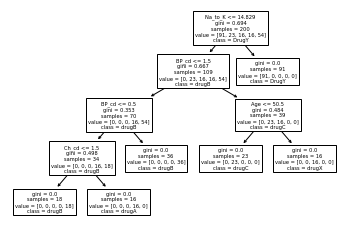

In [110]:
plot_tree(dt, feature_names=x_var, class_names=Q3.Drug.unique())

In [111]:
export_text(dt,feature_names=x_var)

'|--- Na_to_K <= 14.83\n|   |--- BP_cd <= 1.50\n|   |   |--- BP_cd <= 0.50\n|   |   |   |--- Ch_cd <= 1.50\n|   |   |   |   |--- class: drugX\n|   |   |   |--- Ch_cd >  1.50\n|   |   |   |   |--- class: drugC\n|   |   |--- BP_cd >  0.50\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.50\n|   |   |--- Age <= 50.50\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.50\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.83\n|   |--- class: DrugY\n'